In [1]:

import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

import tqdm as tqdm
sns.__version__

'0.11.2'

In [2]:
FILE = 'data/dataset_engineering-01.csv'

data = pd.read_csv(FILE, date_parser=['matchdate'])
data.shape

(65960, 21)

In [3]:
data.head()

,home_team,away_team,correct_score,1N2_1,1N2_N,1N2_2,matchdate,period,location,season,...,home_score,away_score,bet_won,target,odd_win,best_odd_won,home_3_scored,home_3_conceded,away_3_scored,away_3_conceded
0,Arsenal,Aston Villa,1:0,1.30,4.7,8.0,1999-05-16,1999-05,england,1999,...,1.0,0.0,1,0.0,1.30,True,4.0,2.0,6.0,6.0
1,Charlton,Sheffield Wed,0:1,1.65,3.6,4.0,1999-05-16,1999-05,england,1999,...,0.0,1.0,2,2.0,4.00,False,5.0,7.0,1.0,2.0
2,Chelsea,Derby,2:1,1.50,3.5,6.0,1999-05-16,1999-05,england,1999,...,2.0,1.0,1,0.0,1.50,True,6.0,3.0,2.0,2.0
3,Coventry,Leeds,2:2,3.00,2.9,2.4,1999-05-16,1999-05,england,1999,...,2.0,2.0,N,1.0,2.90,False,2.0,2.0,6.0,2.0
4,Liverpool,Wimbledon FC,3:0,1.55,3.3,5.8,1999-05-16,1999-05,england,1999,...,3.0,0.0,1,0.0,1.55,True,5.0,5.0,2.0,5.0


In [4]:
data.columns.tolist()

['home_team',
 'away_team',
 'correct_score',
 '1N2_1',
 '1N2_N',
 '1N2_2',
 'matchdate',
 'period',
 'location',
 'season',
 'competition',
 'home_score',
 'away_score',
 'bet_won',
 'target',
 'odd_win',
 'best_odd_won',
 'home_3_scored',
 'home_3_conceded',
 'away_3_scored',
 'away_3_conceded']

In [5]:
data.best_odd_won.value_counts(normalize=True)

False    0.5052
True     0.4948
Name: best_odd_won, dtype: float64

In [6]:
data.bet_won.value_counts(normalize=True)

1    0.447574
N    0.277896
2    0.274530
Name: bet_won, dtype: float64

In [7]:
import sweetviz as sv

my_report = sv.analyze(data)
my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

                                             |          | [  0%]   00:00 -> (? left)

/Users/darylfelix/opt/anaconda3/lib/python3.9/site-packages/sweetviz/utils.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clamped_series = clamped_series.append(other_series, ignore_index=False)
/Users/darylfelix/opt/anaconda3/lib/python3.9/site-packages/sweetviz/utils.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clamped_series = clamped_series.append(other_series, ignore_index=False)
/Users/darylfelix/opt/anaconda3/lib/python3.9/site-packages/sweetviz/utils.py:34: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  clamped_series = clamped_series.append(other_series, ignore_index=False)
/Users/darylfelix/opt/anaconda3/lib/python3.9/site-packages/sweetviz/utils.py:34: FutureWarning: The series.append method is de

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [8]:
data.head()

,home_team,away_team,correct_score,1N2_1,1N2_N,1N2_2,matchdate,period,location,season,...,home_score,away_score,bet_won,target,odd_win,best_odd_won,home_3_scored,home_3_conceded,away_3_scored,away_3_conceded
0,Arsenal,Aston Villa,1:0,1.30,4.7,8.0,1999-05-16,1999-05,england,1999,...,1.0,0.0,1,0.0,1.30,True,4.0,2.0,6.0,6.0
1,Charlton,Sheffield Wed,0:1,1.65,3.6,4.0,1999-05-16,1999-05,england,1999,...,0.0,1.0,2,2.0,4.00,False,5.0,7.0,1.0,2.0
2,Chelsea,Derby,2:1,1.50,3.5,6.0,1999-05-16,1999-05,england,1999,...,2.0,1.0,1,0.0,1.50,True,6.0,3.0,2.0,2.0
3,Coventry,Leeds,2:2,3.00,2.9,2.4,1999-05-16,1999-05,england,1999,...,2.0,2.0,N,1.0,2.90,False,2.0,2.0,6.0,2.0
4,Liverpool,Wimbledon FC,3:0,1.55,3.3,5.8,1999-05-16,1999-05,england,1999,...,3.0,0.0,1,0.0,1.55,True,5.0,5.0,2.0,5.0


# Baseline 2
Train a classification model with "bet_won" as target.
The model will be train with
- teams (encoded)
- odds 1N2
- location (encoded)
- previous goals scored and conceded


In [9]:
model_columns = ['home_team','away_team','1N2_1','1N2_N','1N2_2','home_3_scored','home_3_conceded','away_3_scored','away_3_conceded','location','season','bet_won']
df = data[model_columns].copy()
df.sample(5)

,home_team,away_team,1N2_1,1N2_N,1N2_2,home_3_scored,home_3_conceded,away_3_scored,away_3_conceded,location,season,bet_won
49361,Juventus,Crotone,1.11,9.41,25.59,4.0,6.0,3.0,1.0,italy,2017,1
54946,Dijon,Caen,1.88,3.42,4.35,8.0,1.0,2.0,5.0,france,2019,2
41689,Orleans,Clermont,1.99,3.05,4.08,2.0,3.0,4.0,4.0,france,2015,1
12534,Wimbledon FC,Bradford City,2.40,3.13,2.64,2.0,9.0,3.0,5.0,england,2004,1
59765,Stoke,Coventry,2.74,3.02,2.81,1.0,4.0,4.0,4.0,england,2021,2


In [10]:
home_team_encoded = pd.get_dummies(df.home_team, prefix='ht')
away_team_encoded = pd.get_dummies(df.away_team, prefix='at')
location_encoded = pd.get_dummies(df.location, prefix='loc')
home_team_encoded

,ht_AC Ajaccio,ht_AC Carpi,ht_AC Milan,ht_ACR Messina,ht_AFC Wimbledon,ht_AS Roma,ht_Accrington,ht_AlbinoLeffe,ht_Alemannia Aachen,ht_Alessandria,...,ht_West Brom,ht_West Ham,ht_Wigan,ht_Wimbledon FC,ht_Wolfsburg,ht_Wolves,ht_Wrexham,ht_Wycombe,ht_Yeovil,ht_York City
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65955,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
65956,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
65957,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
65958,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
set_2_concatenate = [df, home_team_encoded, away_team_encoded, location_encoded]
set_2_concatenate = [df,  location_encoded]

try:
    df=pd.concat(set_2_concatenate, axis=1).drop(['home_team','away_team','location'], axis=1)
except Exception as e:
    print(e)

df['1N2_1']=1/df['1N2_1']
df['1N2_N']=1/df['1N2_N']
df['1N2_2']=1/df['1N2_2']
df.sample(5)

,1N2_1,1N2_N,1N2_2,home_3_scored,home_3_conceded,away_3_scored,away_3_conceded,season,bet_won,loc_england,loc_france,loc_germany,loc_italy
26910,0.371747,0.308642,0.401606,1.0,3.0,4.0,9.0,2010,1,1,0,0,0
13457,0.689655,0.291545,0.153846,6.0,0.0,4.0,2.0,2004,N,0,1,0,0
191,0.285714,0.338983,0.444444,3.0,2.0,5.0,4.0,1999,1,1,0,0,0
18474,0.440529,0.313480,0.330033,4.0,3.0,5.0,5.0,2007,N,1,0,0,0
43219,0.598802,0.255754,0.182482,8.0,5.0,2.0,5.0,2016,1,1,0,0,0


In [12]:
le = LabelEncoder()
target = le.fit_transform(df.bet_won)
target


array([0, 1, 0, ..., 0, 1, 1])

In [13]:
np.unique(target)

array([0, 1, 2])

In [14]:
X = df.drop('bet_won', axis=1)
y = target

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [16]:
scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

results = {}


In [17]:
clf = DecisionTreeClassifier(random_state=0)
cross_val_score(clf, X_train, y_train, cv=10)

array([0.39366516, 0.39253394, 0.39909502, 0.39239647, 0.39624349,
       0.37497171, 0.39760127, 0.39511202, 0.40529532, 0.39307536])

In [18]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import ExtraTreeClassifier

extra_tree = ExtraTreeClassifier(random_state=0)
cls = BaggingClassifier(extra_tree, random_state=0).fit(
   X_train, y_train)
results['ExtraTreeClassifier']=cls.score(X_test, y_test)


In [19]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=19, random_state=0)
clf.fit(X_train, y_train)
results['RandomForestClassifier']=clf.score(X_test, y_test)


In [20]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=0).fit(X_train, y_train)
results['GradientBoostingClassifier']=clf.score(X_test, y_test)

In [21]:
from sklearn.linear_model import LogisticRegression
class_weight=pd.Series(target).value_counts(normalize=True).to_dict()
clf = LogisticRegression(random_state=0, penalty='elasticnet', solver='saga', l1_ratio=0.5, class_weight=class_weight).fit(X_train,y_train)
results['LogisticRegression']=clf.score(X_test, y_test)


/Users/darylfelix/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [22]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

clf = make_pipeline(StandardScaler(),
                    SGDClassifier(max_iter=1000, tol=1e-3))
clf.fit(X_train, y_train)
results['SGDClassifier pipeline']=clf.score(X_test, y_test)




In [23]:
clf = make_pipeline(StandardScaler(),
                    RandomForestClassifier(n_estimators=50, max_depth=17))
clf.fit(X_train, y_train)
results['RandomForestClassifier pipeline']=clf.score(X_test, y_test)



In [24]:
results

{'ExtraTreeClassifier': 0.4454449395874489,
 'RandomForestClassifier': 0.47787935866219505,
 'GradientBoostingClassifier': 0.4922589240593559,
 'LogisticRegression': 0.44677723158910276,
 'SGDClassifier pipeline': 0.48968622226305875,
 'RandomForestClassifier pipeline': 0.47916570956034366}

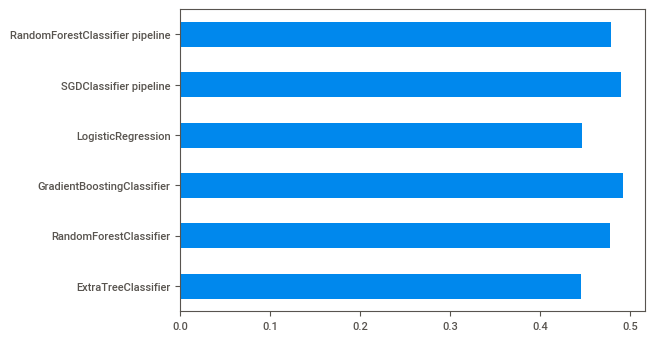

In [25]:
pd.DataFrame(results, index=results.keys()).T.iloc[:,0].plot.barh()
plt.show();